---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span
$$

---

---
# 12.1 Continuous least squares approximation
---

## Recall

In the previous two chapters we approximated a function $f(x)$ over an interval $[a,b]$ by interpolating points $\set{(x_i,f(x_i))}_{i=0}^n$ (and possibly values of $f'$) by either a polynomial $p_n(x)$ having degree at most $n$, or by a piecewise polynomial (e.g., a cubic spline) $p(x)$.

The **error of the approximation** was measured using the **infinity-norm**:

$$
\norm{f - p}_\infty := \max_{x \in [a,b]} \abs{f(x) - p(x)}.$$

We found valid upper bounds on this error, such as 

$$\norm{f - p_n}_\infty \leq \frac{\norm{f^{(n+1)}}_\infty}{(n+1)!} \max_{x \in [a,b]} \prod_{i=0}^n \abs{x-x_i},$$

for the unique polynomial $p_n(x)$ having degree at most $n$ interpolating $(x_0,f(x_0)), \ldots, (x_n,f(x_n))$.

We even looked an minimizing this upper bound, which led us to studying **Chebyshev points**.

## Best approximation

We now will look at minimizing the **approximation error** directly. 

Given a set of **linearly independent** functions $\set{\phi_j(x)}_{j=0}^n$, we want to find a function 

$$p(x) = \sum_{j=0}^n c_j \phi_j(x)$$

that minimizes the error $\norm{f - p}$, where $\norm{\cdot}$ is a **function norm**.

## Function norms

Let $\norm{\cdot}$ be a **norm** for $f \in C[a,b]$.

Then $\norm{\cdot}$ is a function that takes an input $f$ and returns a real number.

A norm $\norm{\cdot}$ for functions must satisfy:

1. $\norm{f} \geq 0$, for all functions $f$, and $\norm{f} = 0$ if and only if $f(x) = 0$, for all $x \in [a,b]$;

2. $\norm{\alpha f} = \abs{\alpha} \norm{f}$, for all $\alpha \in \mathbb{R}$;

3. $\norm{f+g} \leq \norm{f} + \norm{g}$ for all $f, g \in C[a,b]$.

## Examples of function norms

The $L_1$ norm of a function $f \in C[a,b]$ is defined as

$$\norm{f}_1 := \int_a^b \abs{f(x)} dx.$$

The $L_\infty$ norm of a function $f \in C[a,b]$ is defined as

$$\norm{f}_\infty := \max_{x \in [a,b]} \abs{f(x)}.$$

We will define the $L_2$ norm in terms of the inner-product.

The **inner-product** of two functions $f,g \in C[a,b]$ is defined as

$$\ip{f}{g} := \int_a^b f(x) g(x)\,dx.$$

Note that we can use the inner-product to talk about the **angle** between functions. For example, functions $f$ and $g$ are said to be **orthogonal** if $\ip{f}{g} = 0.$

The $L_2$ norm of a function $f \in C[a,b]$ is defined as

$$\norm{f}_2 := \sqrt{\ip{f}{f}} = \paren{\int_a^b \brack{f(x)}^2 dx}^{\frac12}.$$

In this chapter, we will consider methods for minimizing $\norm{f-p}_2$, also known as the **continuous least-squares problem**.

## Solving the continuous least-squares problem

We want to find the coefficients $c_0,\ldots,c_n$ such that 

$$p(x) = \sum_{j=0}^n c_j \phi_j(x)$$

minimizes $\norm{f-p}_2$ over all functions $p \in \span\set{\phi_0,\ldots,\phi_n}$.

Equivalently, we can minimize 

$$
\begin{align}
\norm{f-p}_2^2 
& = \ip{f-p}{f-p} \\
& = \ip{f}{f} - 2\ip{f}{p} + \ip{p}{p} \\
& = \ip{f}{f} - 2\ip{f}{\sum_{j=0}^n c_j \phi_j} + \ip{\sum_{j=0}^n c_j \phi_j}{\sum_{j=0}^n c_j \phi_j} \\
& = \ip{f}{f} - 2\sum_{j=0}^n c_j \ip{f}{\phi_j} + \sum_{j=0}^n \sum_{k=0}^n c_j c_k \ip{\phi_j}{\phi_k} \\
& = \ip{f}{f} - 2b^Tc + c^T B c, \\
\end{align}
$$

where $B \in \mathbb{R}^{(n+1) \times (n+1)}$ and $b, c \in \mathbb{R}^{n+1}$ are defined as

$$
B := 
\begin{bmatrix}
\ip{\phi_0}{\phi_0} & \cdots & \ip{\phi_0}{\phi_n} \\
\vdots & \ddots & \vdots\\
\ip{\phi_n}{\phi_0} & \cdots & \ip{\phi_n}{\phi_n} \\
\end{bmatrix},
\qquad
b := 
\begin{bmatrix}
\ip{f}{\phi_0}\\
\vdots\\
\ip{f}{\phi_n}\\
\end{bmatrix},
\qquad
c := 
\begin{bmatrix}
c_0 \\
\vdots\\
c_n \\
\end{bmatrix}.
$$

## The normal equations

Let $g \colon \mathbb{R}^{n+1} \to \mathbb{R}$ be defined as

$$g(c) = c^T B c - 2b^Tc + \ip{f}{f}.$$

So we want to find $c^* \in \mathbb{R}^{n+1}$ such that

$$g(c^*) \leq g(c), \quad \forall c \in \mathbb{R}^{n+1}.$$

From multivariable calculus, we know that any **local minimizer** $c^*$ much satisfy $\nabla g(c^*) = 0$.

It is not too difficult to show that 

$$\nabla g(c) = 2Bc - 2b.$$

Therefore, we just need to solve the following linear system:

$$Bc^* = b.$$

This linear system is known as the **normal equations** for the **continuous least-squares problem**.

---

## Example

Let's find the polynomial of degree at most $n$ that best fits $f(x) = \cos(x)$ over the interval $[0, 2\pi]$.

Using the **monomial basis** $\set{1,x,x^2,\ldots,x^n}$, we have 

$$B_{ij} = \ip{x^i}{x^j} = \int_0^{2\pi} x^i x^j dx = \frac{(2\pi)^{i+j+1}}{i+j+1}, \quad i,j = 0,\ldots,n,$$

and 

$$b_i = \ip{x^i}{\cos(x)} = \int_0^{2\pi} x^i \cos(x)\,dx, \quad i = 0,\ldots,n.$$

In [1]:
using SymPy

n = 2
B = [(2PI)^(i+j+1)/(i+j+1) for i=0:n, j=0:n]

3×3 Matrix{Sym{PyCall.PyObject}}:
     2⋅π    2*pi^2   8*pi^3/3
   2*pi^2  8*pi^3/3     4*pi^4
 8*pi^3/3    4*pi^4  32*pi^5/5

We can use `SymPy` to evaluate the vector $b$.

In [2]:
x = symbols("x")

bsym = [integrate(x^i*cos(x), (x, 0, 2PI)) for i=0:n]

3-element Vector{Sym{PyCall.PyObject}}:
    0
    0
 4⋅π

In [3]:
# Solving B*csym = bsym for csym
csym = B\bsym

3-element Vector{Sym}:
     15/pi^2
    -45/pi^3
 45/(2*pi^4)

Alternatively, we can use the numerical integration function `quadgk` (will study these methods in Chapter 15).

In [4]:
using QuadGK

In [5]:
bnum = [quadgk(x -> x^i*cos(x), 0, 2π)[1] for i=0:n]

3-element Vector{Float64}:
  1.0408340855860843e-17
 -1.970645868709653e-15
 12.56637061435916

In [6]:
b = float(bsym)

3-element Vector{Float64}:
  0.0
  0.0
 12.566370614359172

In [7]:
b - bnum

3-element Vector{Float64}:
 -1.0408340855860843e-17
  1.970645868709653e-15
  1.2434497875801753e-14

In [8]:
function continuous_lsqr(f, a, b, n) 
    B = [quadgk(x -> x^i*x^j, a, b)[1] for i=0:n, j=0:n]
    b = [quadgk(x -> x^i*f(x), a, b)[1] for i=0:n]
    c = B\b
end

continuous_lsqr (generic function with 1 method)

In [9]:
c = continuous_lsqr(cos, 0, 2π, 2)

3-element Vector{Float64}:
  1.5198177546350684
 -1.4513190494939785
  0.23098460073039775

In [11]:
float.(csym)

3-element Vector{Float64}:
  1.5198177546350666
 -1.451319049493977
  0.23098460073039753

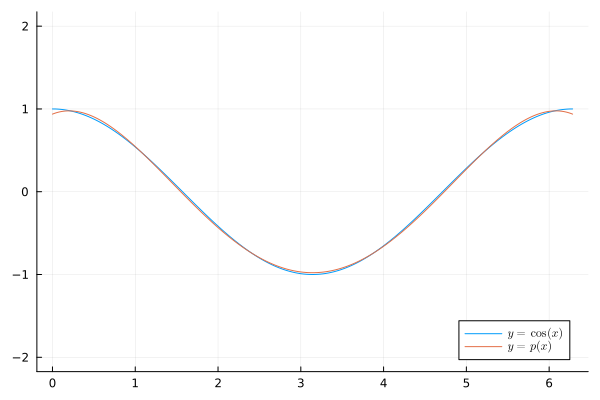

In [17]:
using Plots, LaTeXStrings

n = 4

xx = range(0, 2π, length=1000)

plot(legend=:bottomright, aspect_ratio=:equal, size=(600,400))
plot!(xx, cos.(xx), label=L"y = \cos(x)")

# Evaluate p using Horner's rule
c = continuous_lsqr(cos, 0, 2π, n)
p = zeros(length(xx))
for i=n+1:-1:1
    p = p.*xx .+ c[i]
end

plot!(xx, p, label=L"y = p(x)")

---

## Unique solution to the normal equations

In addition, the matrix $B$ is **symmetric** and **positive definite**. 

It is clear that $B$ is symmetric since $\ip{\phi_j}{\phi_k} = \ip{\phi_k}{\phi_j}$.

To show $B$ is positive definite, we let $c \in \mathbb{R}^{n+1}$ be nonzero, and note that 

$$c^T B c = \ip{p}{p} = \norm{p}_2^2,$$

where $p = \sum_{j=0}^n c_j \phi_j$. Since $c \neq 0$, we have that $p \neq 0$ due to the fact the functions $\phi_0,\ldots,\phi_n$ are **linearly independent**. Thus, $c^T B c = \norm{p}_2^2 > 0$.

Positive definite matrices are nonsingular, so $B$ is nonsingular.

The proof is easy. Suppose that $B$ is singular. Then there is a nonzero vector $c$ such that $Bc = 0$. Then we have

$$c^T B c = 0,$$

which contradicts the fact that $B$ is positive definite. Thus $B$ must be nonsingular.

Thus, there is a **unique solution** $c^*$ to the normal equations.

## Unique global minimizer

Let $\Delta c \in \mathbb{R}^{n+1}$ be nonzero. Then,

$$
\begin{align}
g(c^* + \Delta c) 
&=  (c^* + \Delta c)^T B (c^* + \Delta c) - 2b^T (c^* + \Delta c) + \ip{f}{f}\\
&=  \paren{c^*}^T B c^* + 2\paren{\Delta c}^T B c^* +  \paren{\Delta c}^T B \Delta c - 2b^T c^* - 2b^T \Delta c + \ip{f}{f}\\
&= g(c^*) + 2\paren{\Delta c}^T \paren{B c^* - b} +  \paren{\Delta c}^T B \Delta c \\
&= g(c^*) +  \paren{\Delta c}^T B \Delta c \\
&> g(c^*). \\
\end{align}
$$

Therefore, $g(c^*) < g(c^* + \Delta c)$, for all $\Delta c \neq 0$, which implies that $c^*$ is the **unique global minimizer**.

## Orthogonal projection

Geometrically, $p = \sum_{j=0}^n c_j^* \phi_j$ is the **orthogonal projection** of $f$ onto $\span \set{\phi_0,\ldots,\phi_n}$.

We can see this by noting that the **residual function** $r = f - p$ is orthogonal to every basis vector $\phi_i$:

$$
\begin{align}
\ip{r}{\phi_i} 
&= \ip{f-p}{\phi_i} \\
& = \ip{f}{\phi_i} - \ip{p}{\phi_i}\\
& = b_i - \ip{\sum_{j=0}^n c_j^* \phi_j}{\phi_i}\\
& = b_i - \sum_{j=0}^n c_j^* \ip{\phi_j}{\phi_i}\\
& = b_i - \sum_{j=0}^n c_j^* B_{ij}\\
& = b_i - \paren{B c^*}_i\\
& = 0,\\
\end{align}
$$

since $B c^* = b$. 

Indeed, the normal equations can be interpreted as $\ip{f-p}{\phi_i} = 0$, for $i=0,\ldots,n$.

Therefore, $r = f - p$ is orthogonal to the whole space $\span\set{\phi_0,\ldots,\phi_n}$, and we conclude that $p$ is the orthogonal projection of $f$ onto $\span\set{\phi_0,\ldots,\phi_n}$.

---

## Pros and cons of using the monomial basis for continuous least squares

### Pros:

1. Simple. Over the interval $[a,b]$, we have:

   $$B_{ij} = \frac{(b-a)^{i+j+1}}{i+j+1}, \quad i,j = 0,\ldots,n.$$

   Thus, $B$ is easy to evaluate. When $[a,b] = [0,1]$, we have the famous **[Hilbert matrix](http://en.wikipedia.org/wiki/Hilbert_matrix)**:

  $$B = H_{n+1} =
  \begin{bmatrix}
  1 & \frac12 & \cdots & \frac{1}{n+1} \\
  \frac12 & \frac13 & \cdots & \frac{1}{n+2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{1}{n+1} & \frac{1}{n+2} & \cdots & \frac{1}{2n + 1}\\
  \end{bmatrix}.
  $$

### Cons:

1. Solving $B c = b$ can be expensive for large $n$.

2. The matrix $B$ is highly **ill-conditioned** which means that the computed solution $c$ is highly sensitive to errors in the right-hand-side vector $b$ and to the round-off errors that occur during the computation.


---